<a href="https://colab.research.google.com/github/Jdasanja/mirrored-dataset/blob/main/Project_1_v1_ADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

In [ ]:
!pip install pyreadstat

**<h1> Step 1: Importing Dataset</h1>**

In [ ]:
url = 'https://github.com/Jdasanja/mirrored-dataset/blob/main/fram_heart_study.csv?raw=true'
df = pd.read_csv(url,index_col=0)
print(df.head(5))

      age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
male                                                                       
1      39        4.0              0         0.0     0.0                0   
0      46        2.0              0         0.0     0.0                0   
1      48        1.0              1        20.0     0.0                0   
0      61        3.0              1        30.0     0.0                0   
0      46        3.0              1        23.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
male                                                                    
1                0         0    195.0  106.0   70.0  26.97       80.0   
0                0         0    250.0  121.0   81.0  28.73       95.0   
1                0         0    245.0  127.5   80.0  25.34       75.0   
0                1         0    225.0  150.0   95.0  28.58       65.0   
0                0         0 

**<h1> Step 2: Divide into a Training and Testing set </h1>**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# Drop the unique identifier and the target column from features
X = df.drop(columns=['TenYearCHD'])

# Separate the target
y = df['TenYearCHD']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and X_test contain only relevant feature columns
# y_train and y_test contain only the target variable

In [ ]:
train_df = pd.concat([X_train, y_train], axis=1)

**<h1>Step 3: Explore your training set.</h1>**

In [ ]:
# Explore the training set
print("DataFrame.info():")
train_df.info()

print("\nDataFrame.describe():")
print(train_df.describe())

DataFrame.info():
<class 'pandas.core.frame.DataFrame'>
Index: 3392 entries, 0 to 0
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3392 non-null   int64  
 1   education        3302 non-null   float64
 2   currentSmoker    3392 non-null   int64  
 3   cigsPerDay       3366 non-null   float64
 4   BPMeds           3346 non-null   float64
 5   prevalentStroke  3392 non-null   int64  
 6   prevalentHyp     3392 non-null   int64  
 7   diabetes         3392 non-null   int64  
 8   totChol          3349 non-null   float64
 9   sysBP            3392 non-null   float64
 10  diaBP            3392 non-null   float64
 11  BMI              3380 non-null   float64
 12  heartRate        3391 non-null   float64
 13  glucose          3071 non-null   float64
 14  TenYearCHD       3392 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 424.0 KB

DataFrame.describe():
               age    educ

**<h2> Scanning the Dataframe </h2>**

In [ ]:
train_df.head()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,,,,,,,,,,,,,,,
0,53,3.0,1,20.0,0.0,0,0,0,221.0,131.0,89.0,24.09,90.0,95.0,0
0,64,4.0,1,6.0,0.0,0,1,0,239.0,143.0,84.0,20.06,55.0,73.0,0
0,38,3.0,0,0.0,0.0,0,0,0,185.0,100.0,72.0,22.15,85.0,83.0,0
0,49,1.0,0,0.0,0.0,0,0,0,270.0,126.5,67.5,26.56,70.0,77.0,0
1,56,2.0,1,20.0,0.0,0,0,0,186.0,116.0,67.0,24.62,70.0,83.0,0


In [ ]:
## Basic Descriptive
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,3392.000,49.582,8.552,32.000,42.000,49.000,56.000,70.000
education,3302.000,1.967,1.015,1.000,1.000,2.000,3.000,4.000
currentSmoker,3392.000,0.506,0.500,0.000,0.000,1.000,1.000,1.000
cigsPerDay,3366.000,9.184,11.954,0.000,0.000,1.000,20.000,70.000
BPMeds,3346.000,0.031,0.174,0.000,0.000,0.000,0.000,1.000
prevalentStroke,3392.000,0.006,0.075,0.000,0.000,0.000,0.000,1.000
prevalentHyp,3392.000,0.314,0.464,0.000,0.000,0.000,1.000,1.000
diabetes,3392.000,0.027,0.163,0.000,0.000,0.000,0.000,1.000
totChol,3349.000,237.201,43.807,107.000,206.000,234.000,263.000,600.000
sysBP,3392.000,132.466,22.273,83.500,117.000,128.000,144.000,295.000


In [ ]:
train_df.shape

(3392, 15)

**<h1>Step 4: Data cleaning.</h1>**

In [ ]:
## Total count of missing values
train_df.isnull().sum()

age                  0
education           90
currentSmoker        0
cigsPerDay          26
BPMeds              46
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             43
sysBP                0
diaBP                0
BMI                 12
heartRate            1
glucose            321
TenYearCHD           0
dtype: int64

In [ ]:
##Percentage of the column with missing values
train_df.isnull().sum()/len(train_df)*100

age               0.000
education         2.653
currentSmoker     0.000
cigsPerDay        0.767
BPMeds            1.356
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           1.268
sysBP             0.000
diaBP             0.000
BMI               0.354
heartRate         0.029
glucose           9.463
TenYearCHD        0.000
dtype: float64

**<h1>Detecting Missing Values </h1>**

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno

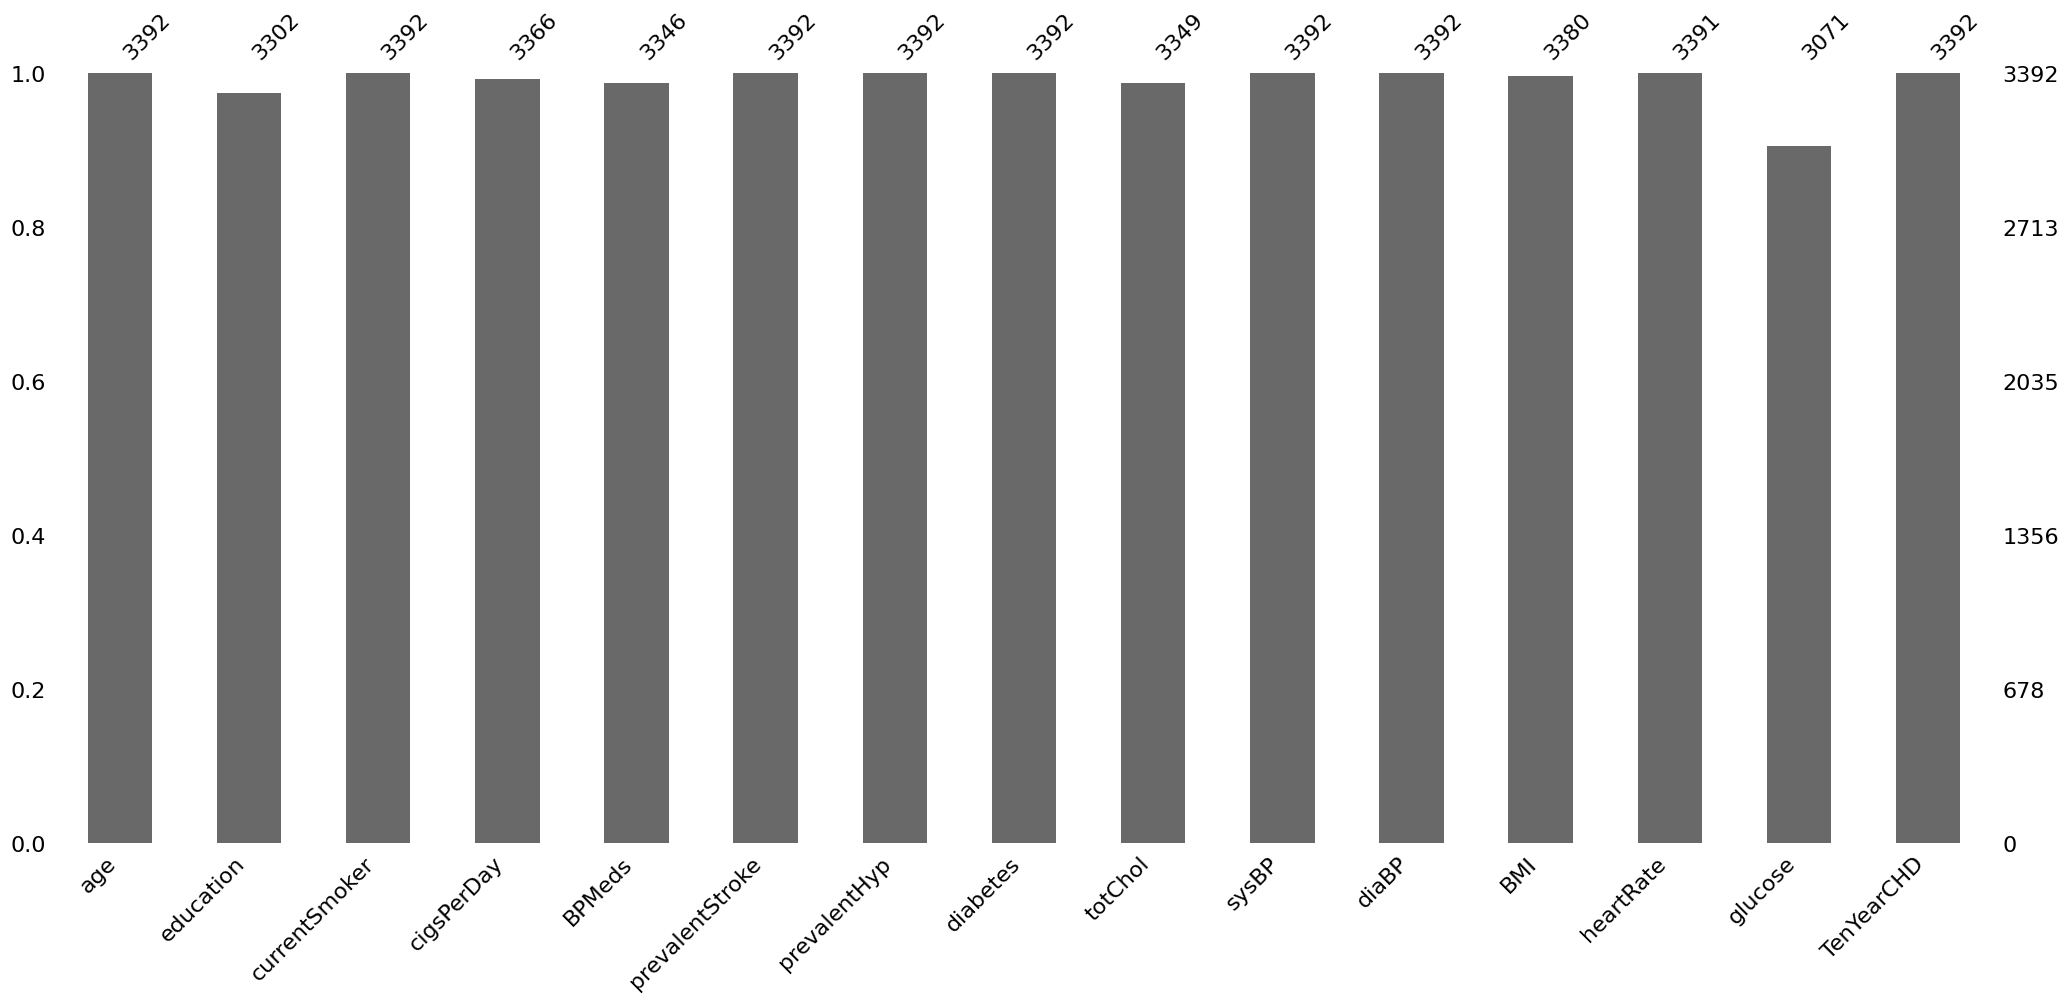

In [ ]:
msno.bar(train_df)
plt.show()

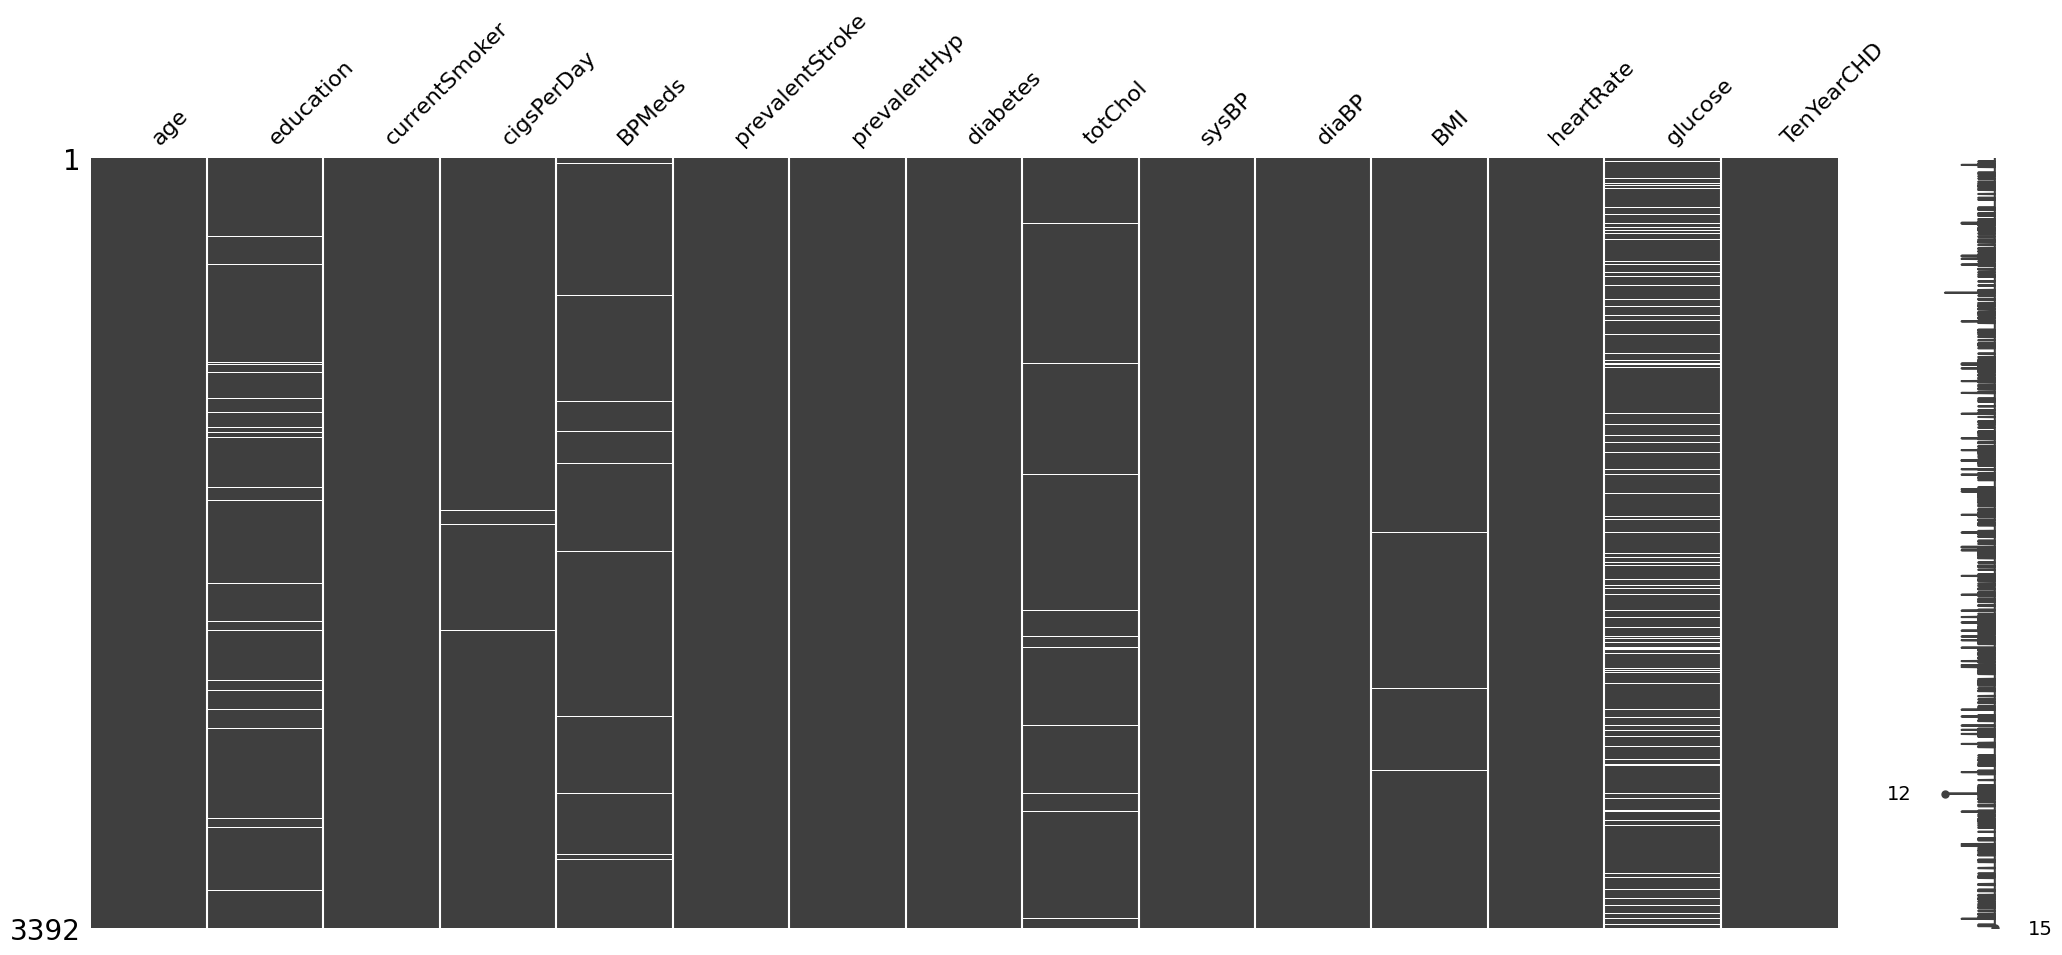

In [ ]:
msno.matrix(train_df)
plt.show()

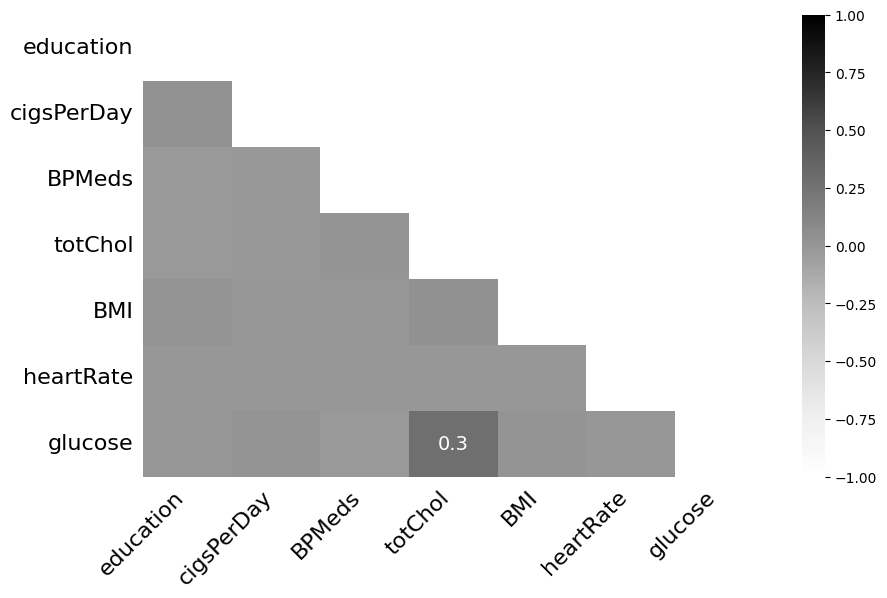

In [ ]:
#visualize the relative missingness of columns?
msno.heatmap(train_df, cmap='Greys', figsize=(10, 6))  # Using a grayscale colormap for darker gradient
plt.show()

**<h2>Dealing with missing values </h1>**

In [ ]:
#Replacing missing values with the mean value
train_df['glucose'] = train_df['glucose'].fillna(train_df['glucose'].mean())
train_df['education'] = train_df['education'].fillna(train_df['education'].mean())
train_df['BPMeds'] = train_df['BPMeds'].fillna(train_df['BPMeds'].mean())
train_df['totChol'] = train_df['totChol'].fillna(train_df['totChol'].mean())

In [ ]:
(train_df.isnull().sum())*100/len(train_df)

age               0.000
education         0.000
currentSmoker     0.000
cigsPerDay        0.767
BPMeds            0.000
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           0.000
sysBP             0.000
diaBP             0.000
BMI               0.354
heartRate         0.029
glucose           0.000
TenYearCHD        0.000
dtype: float64

In [ ]:
## Drop rows with > 10% missingness
train_df = train_df.dropna()

In [ ]:
(train_df.isnull().sum())*100/len(train_df)

age               0.000
education         0.000
currentSmoker     0.000
cigsPerDay        0.000
BPMeds            0.000
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           0.000
sysBP             0.000
diaBP             0.000
BMI               0.000
heartRate         0.000
glucose           0.000
TenYearCHD        0.000
dtype: float64

**<h2> Checking for Duplicates </h2>**

In [ ]:
#check rows for Duplicates
train_df.duplicated().sum()

0

In [ ]:
# checking the distribution of data points between the two classes

majority_class = train_df[train_df['TenYearCHD'] == 0]
minority_class = train_df[train_df['TenYearCHD'] == 1]
print('number of TenYearCHD label 1 is {}'.format(len(minority_class)))
print('while number of TenYearCHD label 0 is {}'.format(len(majority_class)))

#May consider undersampling

number of TenYearCHD label 1 is 513
while number of TenYearCHD label 0 is 2840


**<h1> Step 5:Visualize the data in your training set </h1>**

In [ ]:
 train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3353 entries, 0 to 0
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3353 non-null   int64  
 1   education        3353 non-null   float64
 2   currentSmoker    3353 non-null   int64  
 3   cigsPerDay       3353 non-null   float64
 4   BPMeds           3353 non-null   float64
 5   prevalentStroke  3353 non-null   int64  
 6   prevalentHyp     3353 non-null   int64  
 7   diabetes         3353 non-null   int64  
 8   totChol          3353 non-null   float64
 9   sysBP            3353 non-null   float64
 10  diaBP            3353 non-null   float64
 11  BMI              3353 non-null   float64
 12  heartRate        3353 non-null   float64
 13  glucose          3353 non-null   float64
 14  TenYearCHD       3353 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 419.1 KB


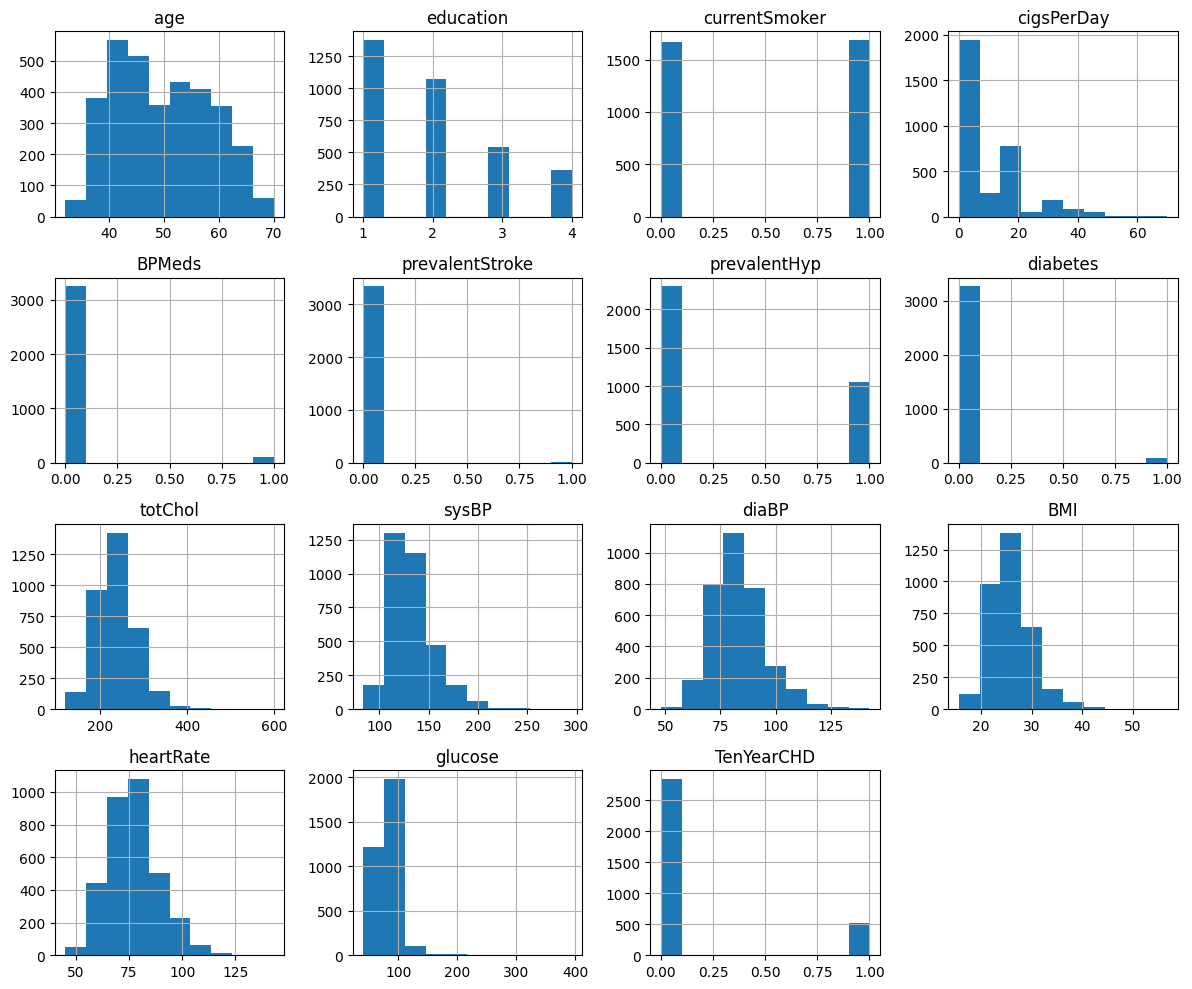

In [ ]:
import matplotlib.pyplot as plt

#Histogram
train_df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


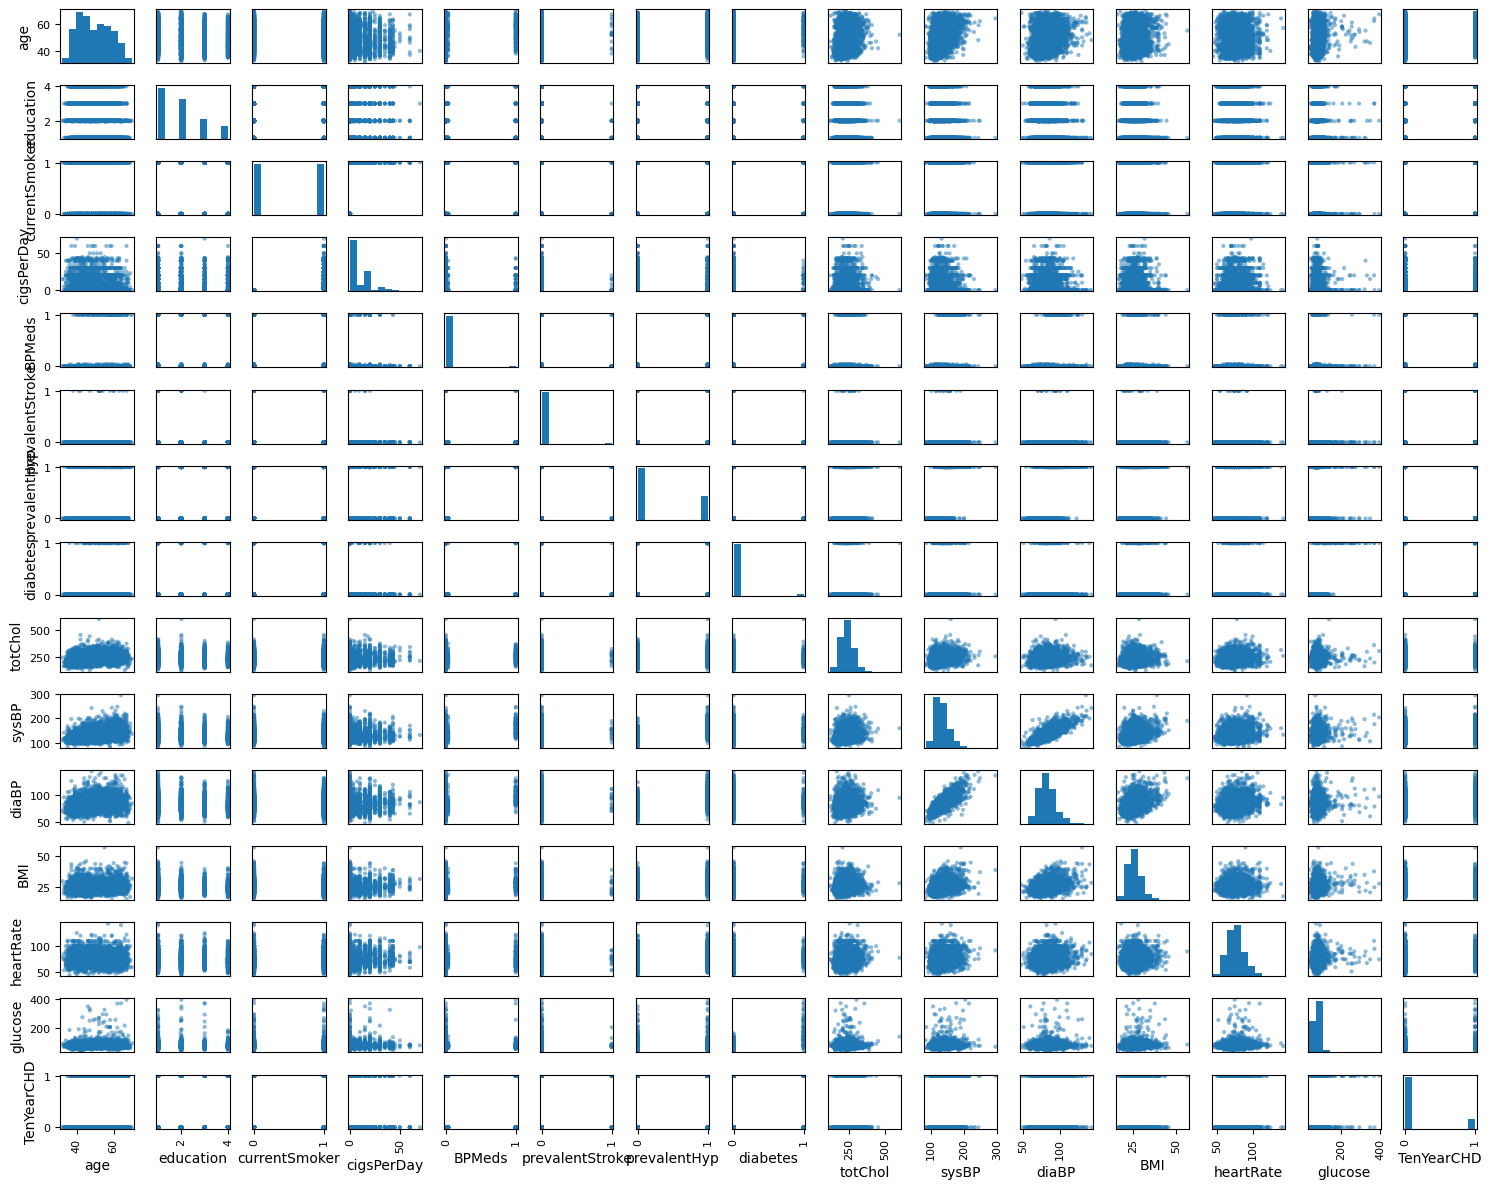

In [ ]:
from pandas.plotting import scatter_matrix


scatter_matrix(train_df, figsize=(15, 12))
plt.tight_layout()
plt.show()

**<h1> Step 6: Apply transformations to your data. </h1>**

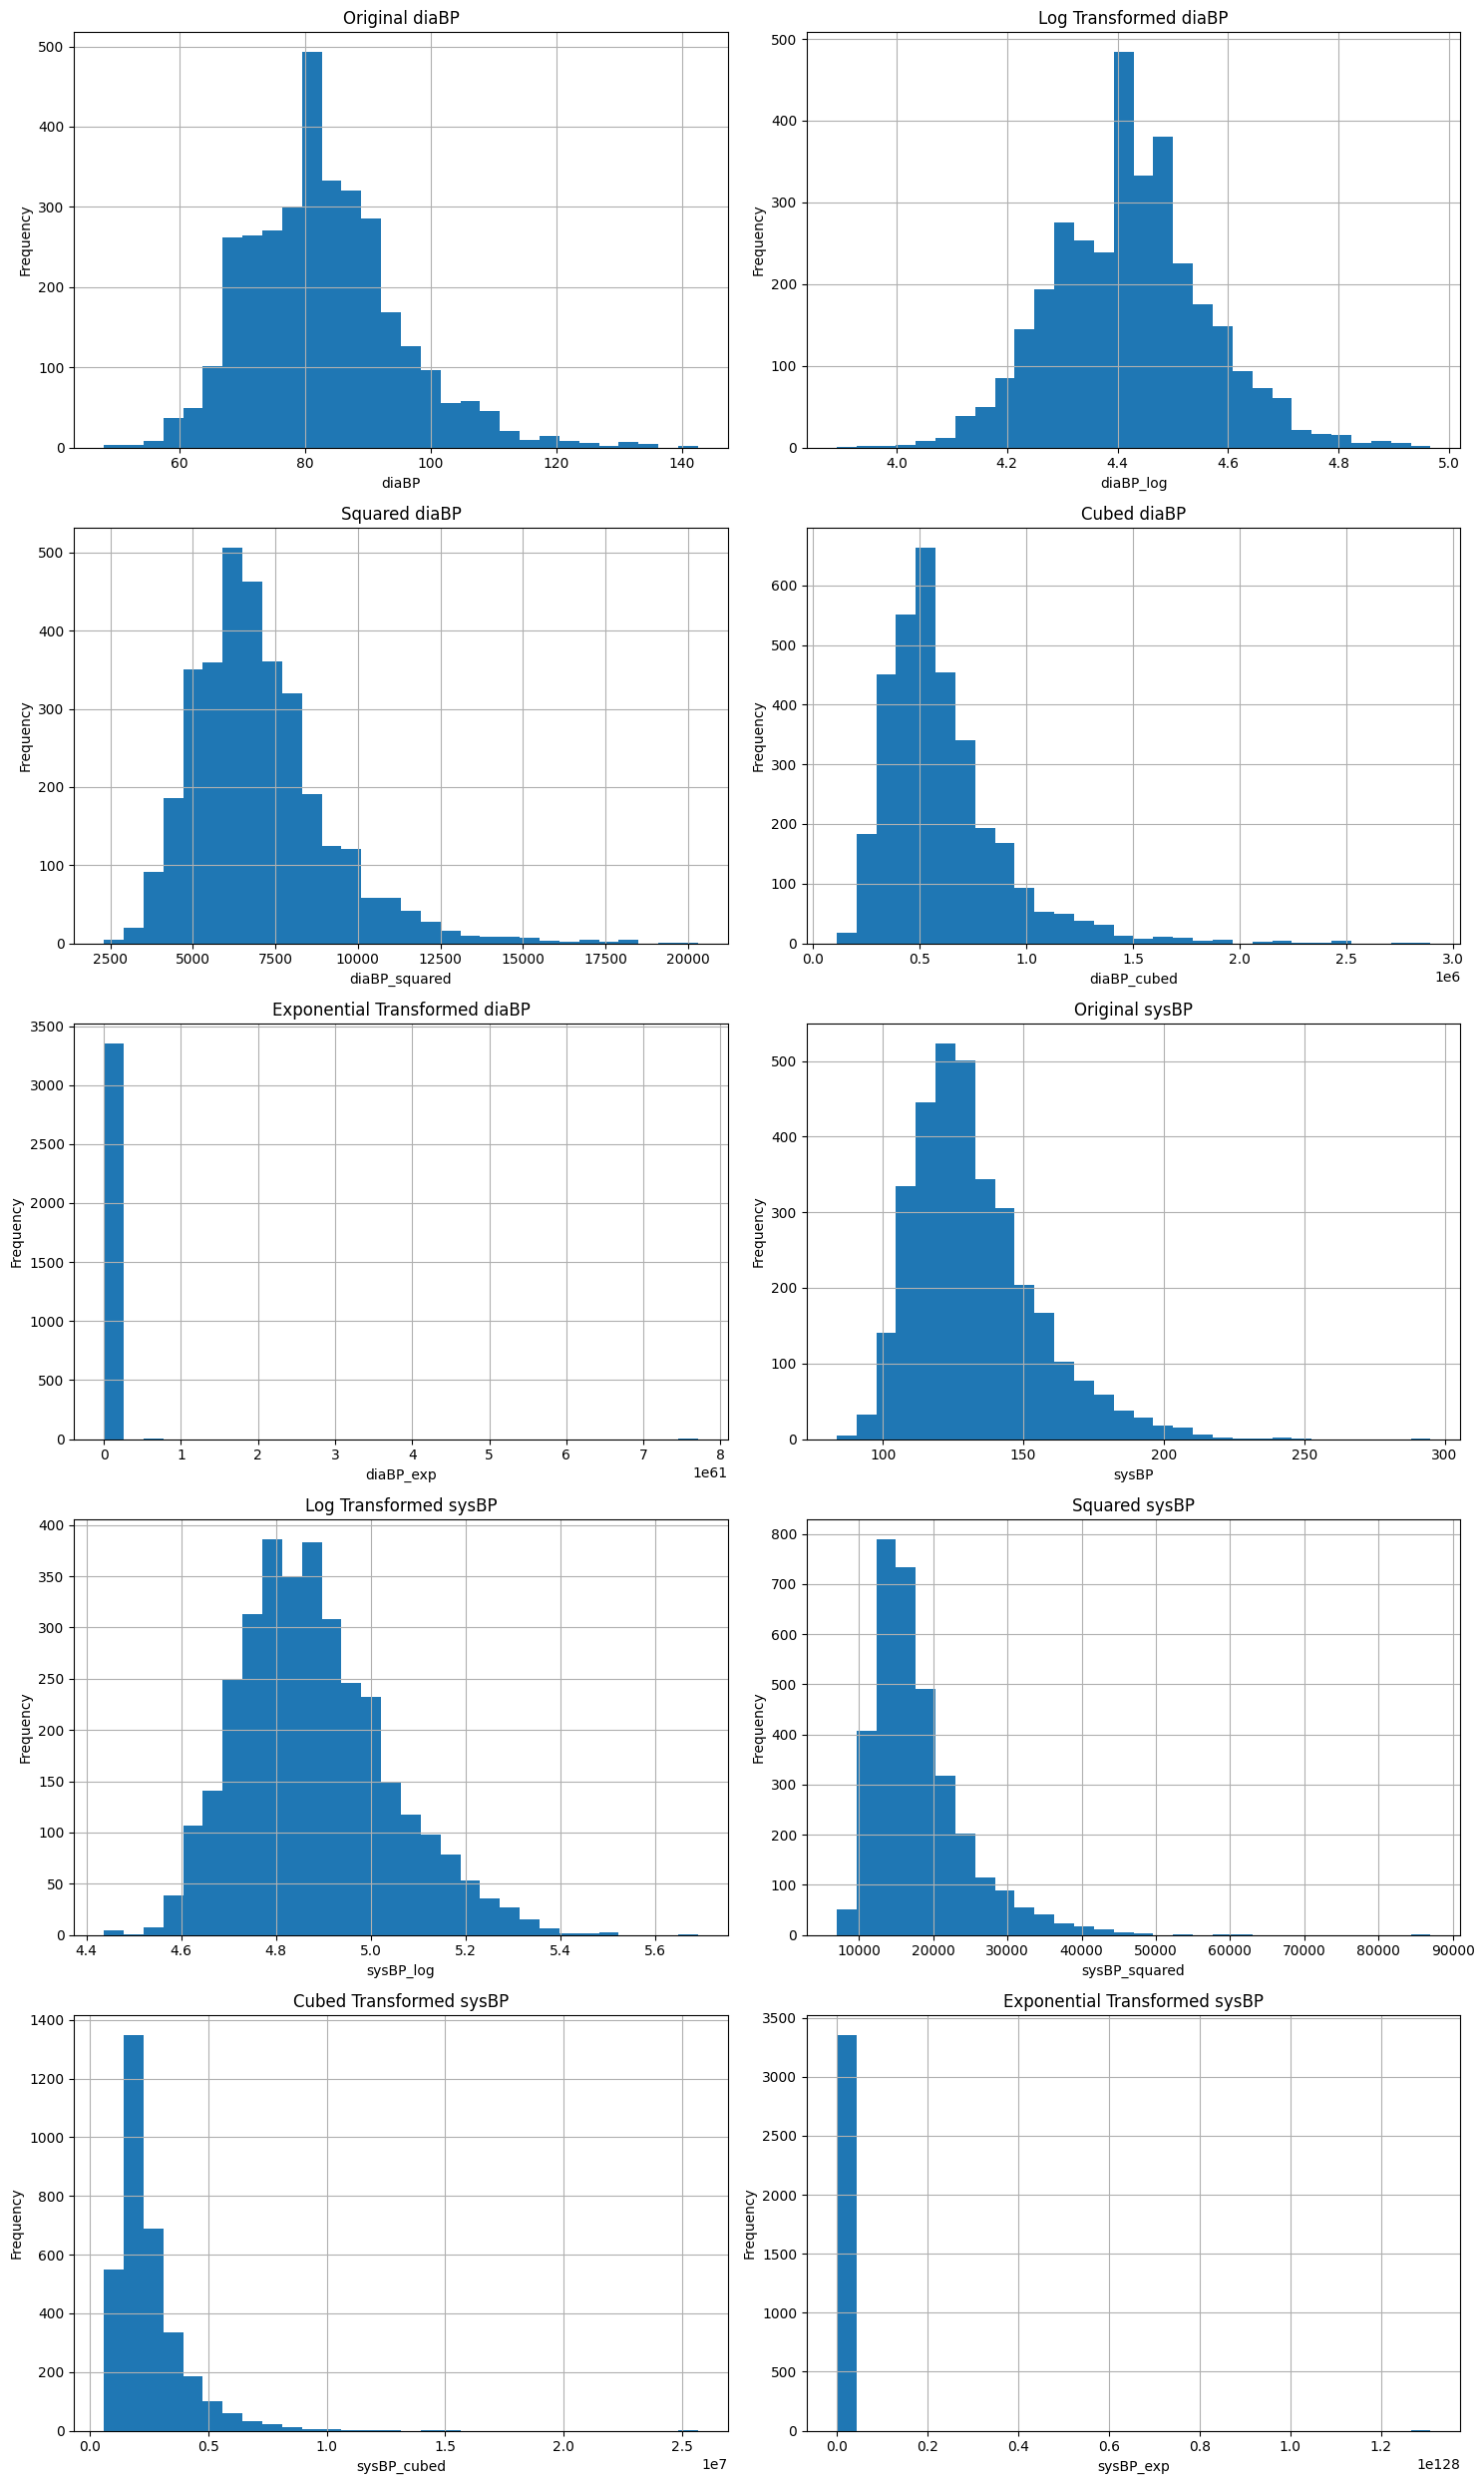

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Apply transformations: logarithmic, squaring, cubing, and exponential
train_df['diaBP_log'] = np.log(train_df['diaBP'] + 1)
train_df['diaBP_squared'] = np.power(train_df['diaBP'], 2)
train_df['diaBP_cubed'] = np.power(train_df['diaBP'], 3)
train_df['diaBP_exp'] = np.exp(train_df['diaBP'])

train_df['sysBP_log'] = np.log(train_df['sysBP'] + 1)
train_df['sysBP_squared'] = np.power(train_df['sysBP'], 2)
train_df['sysBP_cubed'] = np.power(train_df['sysBP'], 3)
train_df['sysBP_exp'] = np.exp(train_df['sysBP'])

# Set up a subplot grid
fig, axes = plt.subplots(5, 2, figsize=(15, 25))  # Adjusting the grid size for additional plots

# Original and transformed 'DBP' (diaBP)
train_df['diaBP'].hist(ax=axes[0, 0], bins=30)
axes[0, 0].set_title('Original diaBP')
axes[0, 0].set_xlabel('diaBP')
axes[0, 0].set_ylabel('Frequency')

train_df['diaBP_log'].hist(ax=axes[0, 1], bins=30)
axes[0, 1].set_title('Log Transformed diaBP')
axes[0, 1].set_xlabel('diaBP_log')
axes[0, 1].set_ylabel('Frequency')

train_df['diaBP_squared'].hist(ax=axes[1, 0], bins=30)
axes[1, 0].set_title('Squared diaBP')
axes[1, 0].set_xlabel('diaBP_squared')
axes[1, 0].set_ylabel('Frequency')

train_df['diaBP_cubed'].hist(ax=axes[1, 1], bins=30)
axes[1, 1].set_title('Cubed diaBP')
axes[1, 1].set_xlabel('diaBP_cubed')
axes[1, 1].set_ylabel('Frequency')

train_df['diaBP_exp'].hist(ax=axes[2, 0], bins=30)
axes[2, 0].set_title('Exponential Transformed diaBP')
axes[2, 0].set_xlabel('diaBP_exp')
axes[2, 0].set_ylabel('Frequency')

# Original and transformed 'sysBP'
train_df['sysBP'].hist(ax=axes[2, 1], bins=30)
axes[2, 1].set_title('Original sysBP')
axes[2, 1].set_xlabel('sysBP')
axes[2, 1].set_ylabel('Frequency')

train_df['sysBP_log'].hist(ax=axes[3, 0], bins=30)
axes[3, 0].set_title('Log Transformed sysBP')
axes[3, 0].set_xlabel('sysBP_log')
axes[3, 0].set_ylabel('Frequency')

train_df['sysBP_squared'].hist(ax=axes[3, 1], bins=30)
axes[3, 1].set_title('Squared sysBP')
axes[3, 1].set_xlabel('sysBP_squared')
axes[3, 1].set_ylabel('Frequency')

train_df['sysBP_cubed'].hist(ax=axes[4, 0], bins=30)
axes[4, 0].set_title('Cubed Transformed sysBP')
axes[4, 0].set_xlabel('sysBP_cubed')
axes[4, 0].set_ylabel('Frequency')

train_df['sysBP_exp'].hist(ax=axes[4, 1], bins=30)
axes[4, 1].set_title('Exponential Transformed sysBP')
axes[4, 1].set_xlabel('sysBP_exp')
axes [4, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
